<a href="https://colab.research.google.com/github/N1sChaLLL/ML_LAB/blob/main/Machine_Learnning_Assignment4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [ ]:
Data = pd.read_csv('ML_DATA_SET.csv') #This is our dataset
Data.head()

,10,about,additionally,after,all,also,an,and,answer,any,...,word,words,work,world,would,years,yes,you,your,Target
0,0.0,0.000000,0.0,0.237291,0.0,0.0,0.0,0.000000,0.084988,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.125129,0.0,0.000000,0.0,0.0,0.0,0.071341,0.117494,0.147442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
X = Data.drop('Target',axis=1)
Y = Data["Target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)


In [ ]:
#Question 1
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier with 3 neighbors
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)
from sklearn.metrics import confusion_matrix,classification_report #Confusion matrix for training
print("Training")
y_pred1 = neigh.predict(X_train)
print(classification_report(Y_train , y_pred1))
print(confusion_matrix(Y_train,y_pred1))
from sklearn.metrics import confusion_matrix,classification_report #Confusion Matrix for testing
y_pred = neigh.predict(X_test)

print("Testing")
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
train_accuracy = neigh.score(X_train, Y_train)
test_accuracy = neigh.score(X_test, Y_test)
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1: #Condiiton to check the test and train accuracy
  print("Model is overfit")
elif train_accuracy < test_accuracy:
  print("Model is underfit")
else:
  print("Model is a regular fit")

Training
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11057
           1       0.72      0.19      0.30       623

    accuracy                           0.95     11680
   macro avg       0.84      0.59      0.64     11680
weighted avg       0.94      0.95      0.94     11680

[[11010    47]
 [  503   120]]
Testing
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4736
           1       0.28      0.08      0.13       271

    accuracy                           0.94      5007
   macro avg       0.62      0.53      0.55      5007
weighted avg       0.91      0.94      0.92      5007

[[4680   56]
 [ 249   22]]
Model is a regular fit


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


In [ ]:
#Question 2

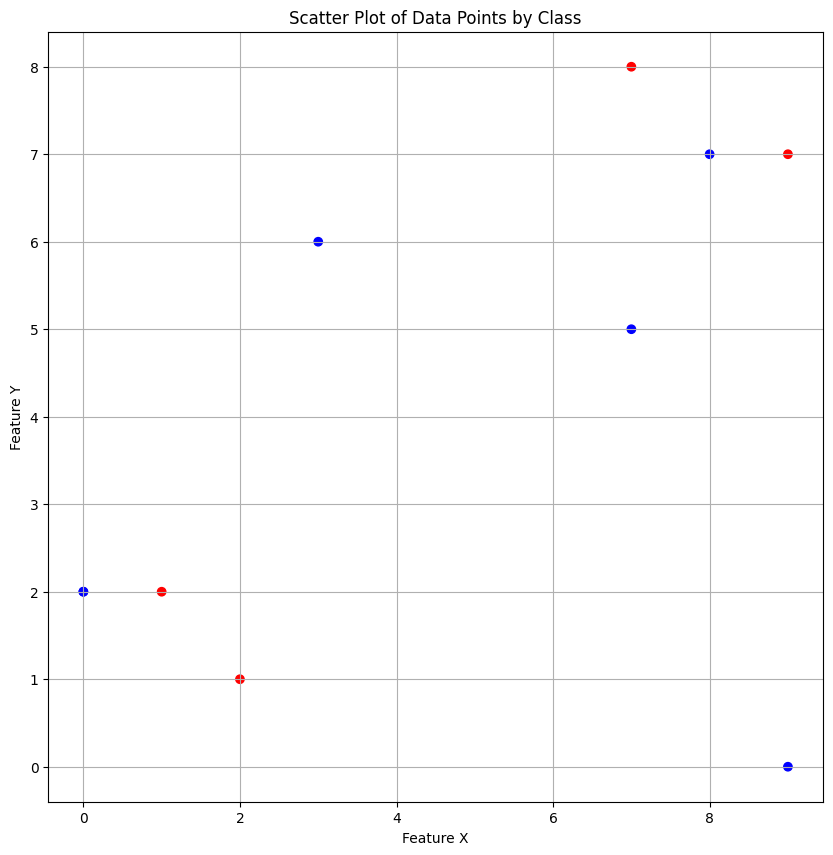

In [ ]:
#Question 3
import random as rd
Training_Dict = {
    "X" : np.random.randint(10, size = 10),
    "Y" : np.random.randint(10, size = 10),
    "Class" : [0,1,1,0,0,0,1,0,1,0]
}
Training_Data = pd.DataFrame(Training_Dict)
Training_Data
Training_Data['Color'] = Training_Data['Class'].apply(lambda x: 'red' if x == 1 else 'blue')
Training_Data
plt.figure(figsize=(10,10))
plt.scatter(Training_Data['X'], Training_Data['Y'], c=Training_Data['Color'])
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Data Points by Class')
plt.grid(True)
plt.show()

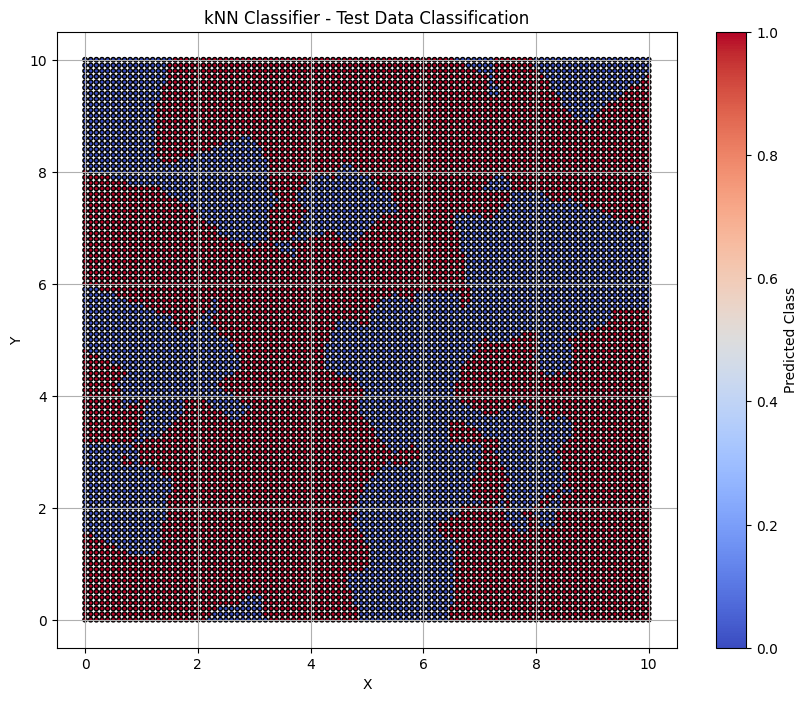

In [ ]:
#Question 4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Function to generate test data
def generate_test_data(start=0, end=10, step=0.1):
    x = np.arange(start, end + step, step)
    y = np.arange(start, end + step, step)
    X_test, Y_test = np.meshgrid(x, y)
    X_test = X_test.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)
    test_data = np.hstack((X_test, Y_test))
    return test_data

# Function to classify test data
def classify_test_data(classifier, test_data):
    return classifier.predict(test_data)

# Function to plot the classified test data
def plot_classified_data(test_data, predictions, class_labels):
    plt.figure(figsize=(10, 8))
    plt.scatter(test_data[:, 0], test_data[:, 1], c=predictions, cmap='coolwarm', s=10, edgecolor='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('kNN Classifier - Test Data Classification')
    plt.colorbar(label='Predicted Class')
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Sample training data (replace this with your actual training data)
    X_train = np.random.rand(100, 2) * 10
    y_train = np.random.randint(0, 2, size=100)

    # Train kNN classifier
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)

    # Generate test data
    test_data = generate_test_data()

    # Classify test data
    predictions = classify_test_data(classifier, test_data)

    # Plot classified data
    plot_classified_data(test_data, predictions, class_labels=[0, 1])


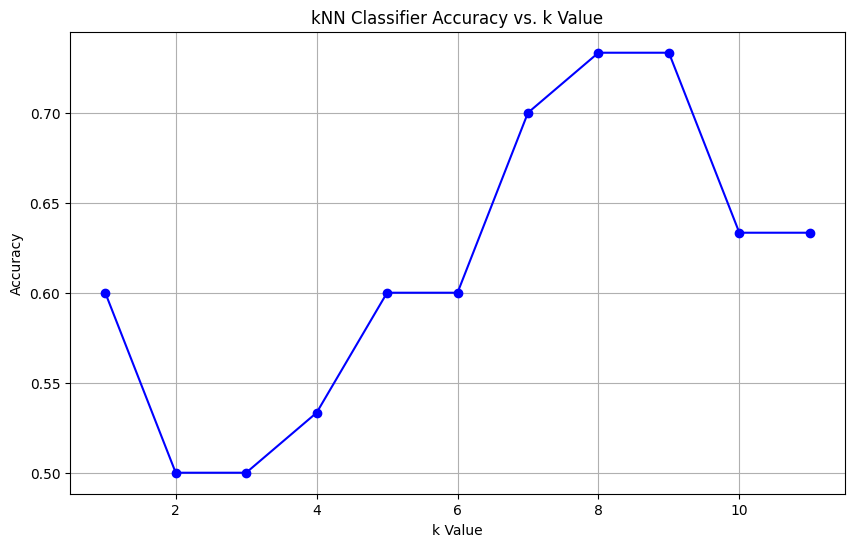

In [ ]:
#Question 5
from sklearn.metrics import accuracy_score

# Function to generate test data
def generate_test_data(start=0, end=10, step=0.1):
    x = np.arange(start, end + step, step)
    y = np.arange(start, end + step, step)
    X_test, Y_test = np.meshgrid(x, y)
    X_test = X_test.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)
    test_data = np.hstack((X_test, Y_test))
    return test_data

# Function to classify test data
def classify_test_data(classifier, test_data):
    return classifier.predict(test_data)

# Example usage
if __name__ == "__main__":
    # Sample training data (replace this with your actual training data)
    X_train = np.random.rand(100, 2) * 10
    y_train = np.random.randint(0, 2, size=100)

    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Generate test data for evaluation
    test_data = generate_test_data()

    k_values = range(1, 12)  # k values from 1 to 11
    accuracies = []

    for k in k_values:
        # Train kNN classifier
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)

        # Classify test data
        predictions = classify_test_data(classifier, X_test)

        # Compute accuracy
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

    # Plot accuracy vs. k values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.title('kNN Classifier Accuracy vs. k Value')
    plt.grid(True)
    plt.show()


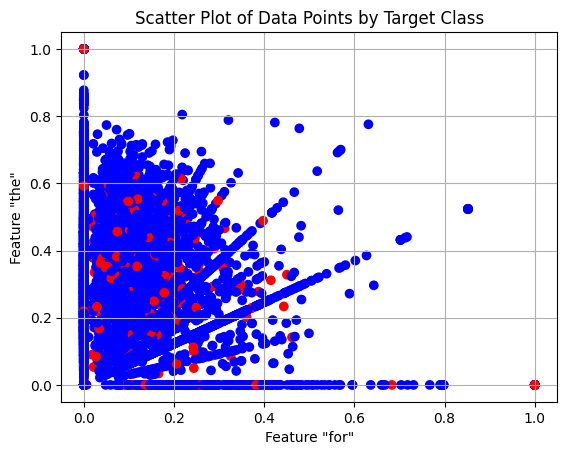

In [ ]:
#Question 6, A3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv('ML_DATA_SET.csv')
data = pd.DataFrame(d)
# Create a color column based on the 'Target' values
data['Color'] = data['Target'].apply(lambda x: 'red' if x == 1 else 'blue')

# Plot the scatter plot
plt.scatter(data['for'], data['the'], c=data['Color'])
plt.xlabel('Feature "for"')
plt.ylabel('Feature "the"')
plt.title('Scatter Plot of Data Points by Target Class')
plt.grid(True)
plt.show()



Accuracy: 0.94


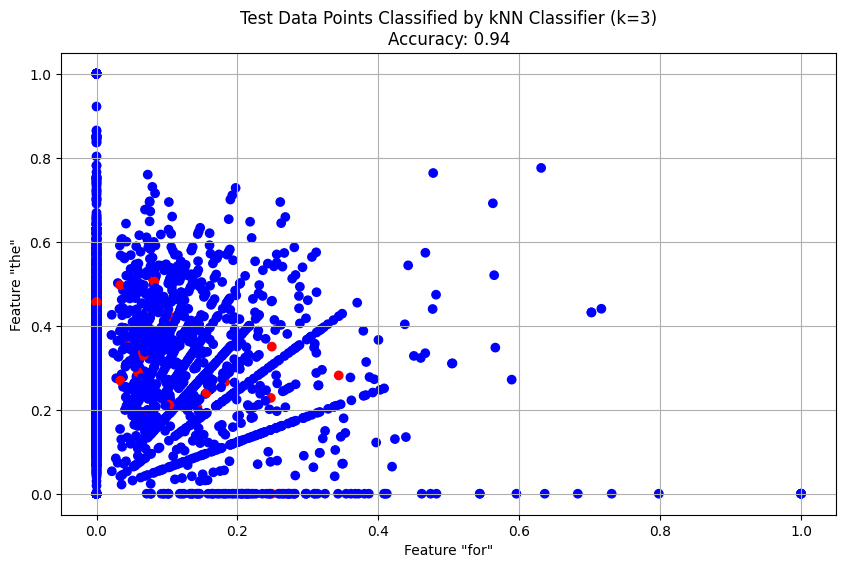

In [ ]:
#Question 6, A4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
d = pd.read_csv('ML_DATA_SET.csv')
data = pd.DataFrame(d)

# Prepare feature matrix X and target vector y
X = data[['for', 'the']]  # Adjust columns as needed
y = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train kNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Add predictions to test data
X_test['Predicted'] = y_pred
X_test['Color'] = X_test['Predicted'].apply(lambda x: 'blue' if x == 0 else 'red')

# Plot the test data with predicted class colors
plt.figure(figsize=(10, 6))
plt.scatter(X_test['for'], X_test['the'], c=X_test['Color'])
plt.xlabel('Feature "for"')
plt.ylabel('Feature "the"')
plt.title(f'Test Data Points Classified by kNN Classifier (k={k})\nAccuracy: {accuracy:.2f}')
plt.grid(True)
plt.show()


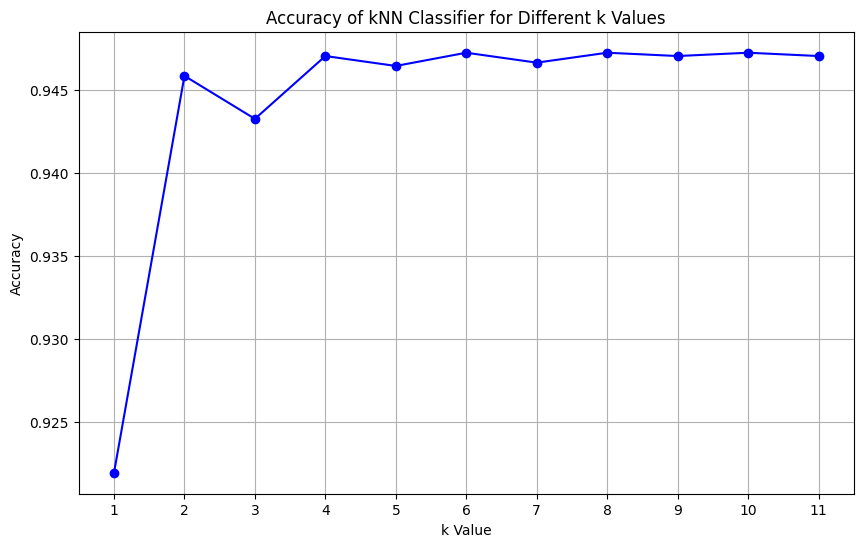

k=1, Accuracy=0.92
k=2, Accuracy=0.95
k=3, Accuracy=0.94
k=4, Accuracy=0.95
k=5, Accuracy=0.95
k=6, Accuracy=0.95
k=7, Accuracy=0.95
k=8, Accuracy=0.95
k=9, Accuracy=0.95
k=10, Accuracy=0.95
k=11, Accuracy=0.95


In [ ]:
#Question 6 A5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
d = pd.read_csv('ML_DATA_SET.csv')
data = pd.DataFrame(d)

# Prepare feature matrix X and target vector y
X = data[['for', 'the']]  # Adjust columns as needed
y = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List to store accuracy for each k
k_values = range(1, 12)  # k values from 1 to 11
accuracies = []

# Loop over different k values
for k in k_values:
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Print the accuracies for reference
for k, accuracy in zip(k_values, accuracies):
    print(f'k={k}, Accuracy={accuracy:.2f}')


In [ ]:
#Question 7
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
d = pd.read_csv('ML_DATA_SET.csv')
data = pd.DataFrame(d)

# Prepare feature matrix X and target vector y
X = data[['for', 'the']]  # Adjust columns as needed
y = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the kNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for 'k' and 'metric'
param_grid = {
    'n_neighbors': range(1, 31),  # Try k values from 1 to 30
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Try different distance metrics
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best accuracy
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.2f}")

# Use the best model to predict on the test data
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Best parameters found: {'metric': 'euclidean', 'n_neighbors': 10}
Best accuracy: 0.95
Test Accuracy: 0.95
